In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
# Reading the data into Data Frame
df = pd.read_csv(r'C:\Users\w10\Downloads\Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
# Removing unwanted spaces from the column names
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [6]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [7]:
# Dropping unwanted Rows by index
df.drop(df.index[122:125], inplace = True)

In [8]:
df[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [9]:
#"""Dropping the specific rows as we have two diffrent regions in the data an hence created a new column region which represents
#"Bejaia Region Dataset as 0 and Sidi-Bel Abbes Region Dataset as 1""""
df.loc[df.index[:122], 'Region'] = "0"
df.loc[df.index[122:], 'Region'] = "1"

In [10]:
#Showing top 5 rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 38.6+ KB


In [13]:
#As per the data set all the features except the "Classes" all are numerical features, hence converting them to the numerical features..
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)


In [14]:
#Summary of Data Set
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.027049
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.426385
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [15]:
#Checking the Null values in data set
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [16]:
df[165:174]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,5.0,NaN,1
169,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,1
170,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1
171,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,fire,1
172,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,fire,1
173,19,7,2012,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13.0,fire,1
174,20,7,2012,36,50,16,0.0,89.9,32.7,71.0,9.5,32.6,17.3,fire,1
175,21,7,2012,36,29,18,0.0,93.9,39.6,80.6,18.5,39.5,30.0,fire,1
176,22,7,2012,32,48,18,0.0,91.5,44.2,90.1,13.2,44.0,25.4,fire,1


In [17]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [18]:
df['Classes'] = df.Classes.str.replace(' ', '')

In [19]:
df['Classes'].mode()[0]

'fire'

In [20]:
# Filling the single NA value as we have one NA value and considering the mode as this is the categorical variable.
df['Classes'].fillna(df['Classes'].mode()[0], inplace= True)

In [21]:
#Replacing Not fire as 0 and Fire as 1

df.replace({"Classes": {"fire": 1, "notfire": 0}}, inplace=True)

In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [23]:
#sns.pairplot(df)


In [24]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

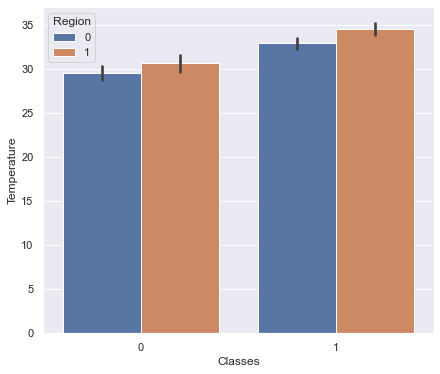

In [25]:
sns.set(rc={'figure.figsize':(7,6)})
sns.barplot(x= "Classes", y="Temperature", data=df, hue="Region")

# Observations

As per the above barplot as the temperature rises the chances of the fire increases, which is also more obvious.

<AxesSubplot:xlabel='Classes', ylabel='month'>

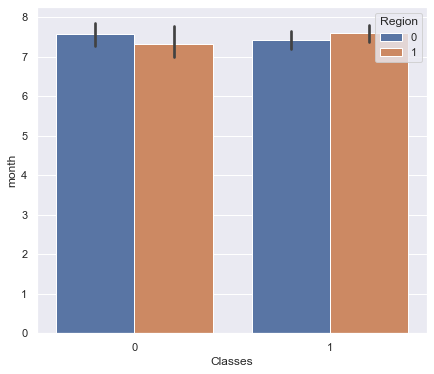

In [26]:
sns.barplot(x= "Classes", y="month", data=df, hue="Region")

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

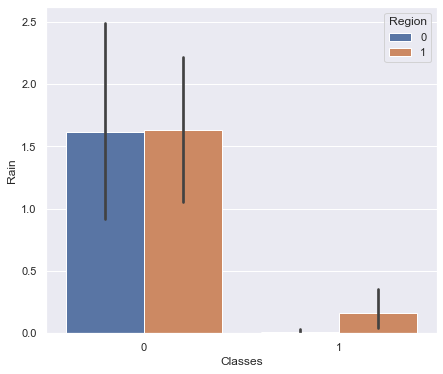

In [27]:
sns.barplot(x= "Classes", y="Rain", data=df, hue="Region")

# Observations

As per the above bar plot if the rainfall is low then there is more chance of fire, and that is obvious too. And as per observation only fire happend in "Sidi-Bel Abbes Region". 

<AxesSubplot:xlabel='Classes', ylabel='day'>

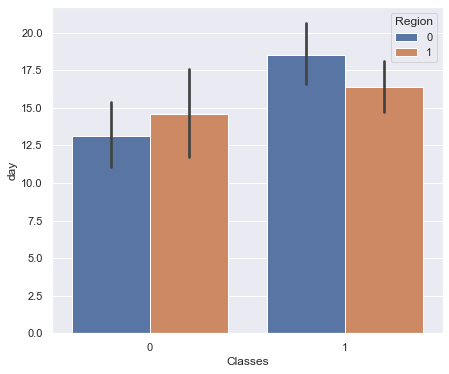

In [28]:
sns.barplot(x= "Classes", y="day", data=df,hue="Region")

<AxesSubplot:xlabel='Classes', ylabel='Ws'>

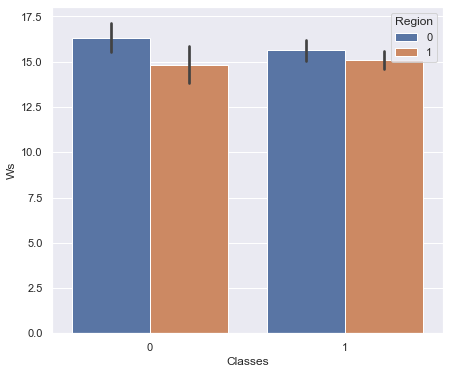

In [29]:
sns.barplot(x= "Classes", y="Ws", data=df, hue="Region")

<AxesSubplot:xlabel='day', ylabel='Temperature'>

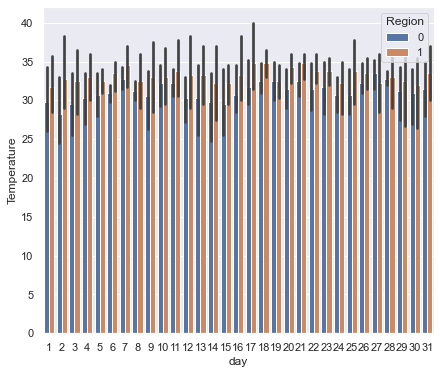

In [30]:
sns.barplot(x= "day", y="Temperature", hue="Region" ,data=df)

# Observations

As per the above bar plot the temerature ranges between Celsius degrees 25 to 35. 

<AxesSubplot:xlabel='day', ylabel='Temperature'>

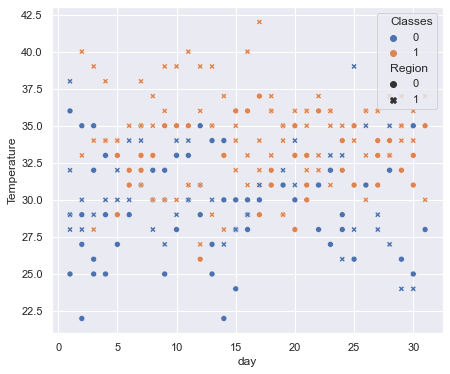

In [31]:
sns.scatterplot(x='day',y='Temperature',hue = "Classes",style= "Region", data=df)

# Observation:



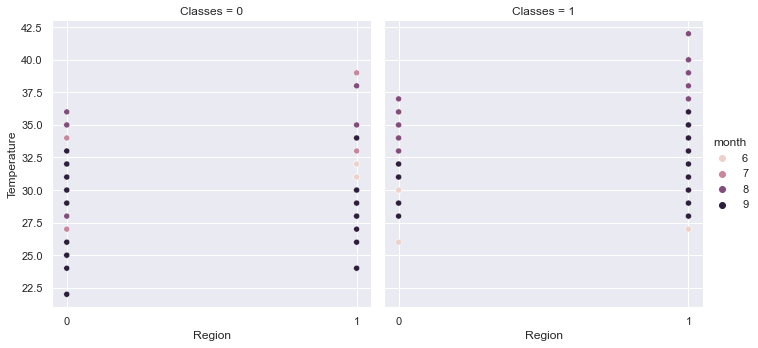

In [32]:
sns.relplot(
    data=df, x="Region", y="Temperature",
     hue="month",col="Classes",
    kind="scatter"
)

# Observation:

As per the above plot it is identified that in "Sidi-Bel Abbes Region" and "Bejaia Region" most of the fire happend in 7 to 9 month. 

In [33]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [34]:
#Checking the Correlation
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350922,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.083098,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.563014,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.575599,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.031308,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324003,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.689317,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875854,0.584188
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739417,0.507122


<AxesSubplot:>

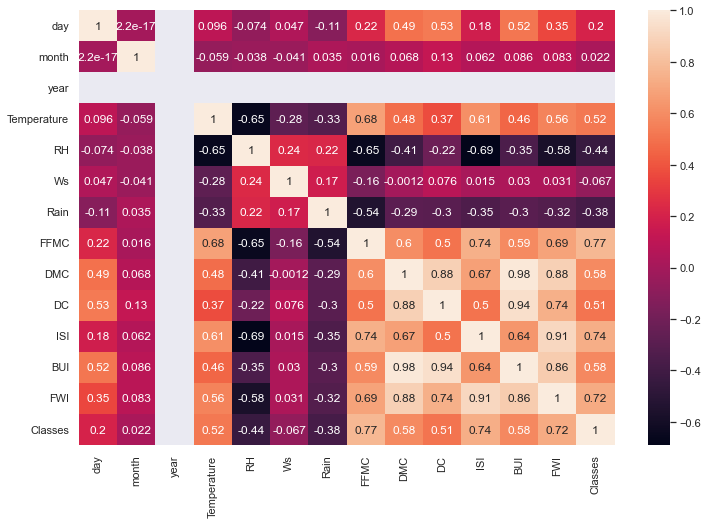

In [35]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(),annot= True)

Text(0, 0.5, 'Wind speed in km/h')

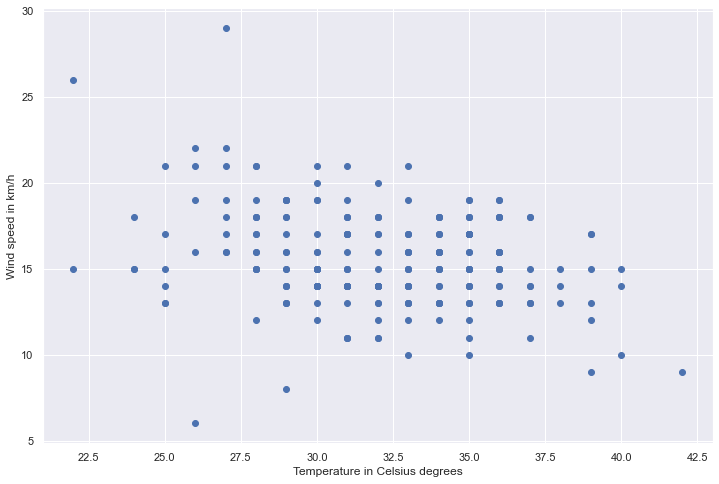

In [36]:
plt.scatter(df['Temperature'],df['Ws'])
plt.xlabel("Temperature in Celsius degrees")
plt.ylabel("Wind speed in km/h")

Text(0, 0.5, 'Rain in mm')

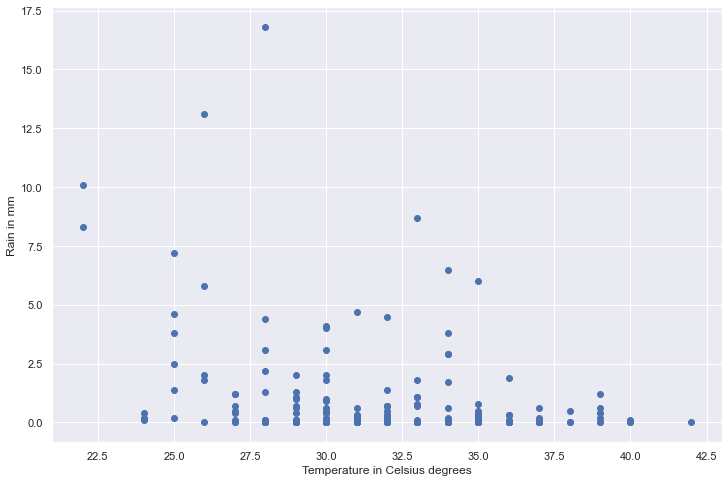

In [37]:
plt.scatter(df['Temperature'],df['Rain'])
plt.xlabel("Temperature in Celsius degrees")
plt.ylabel("Rain in mm")

Text(0, 0.5, 'Relative Humidity in %')

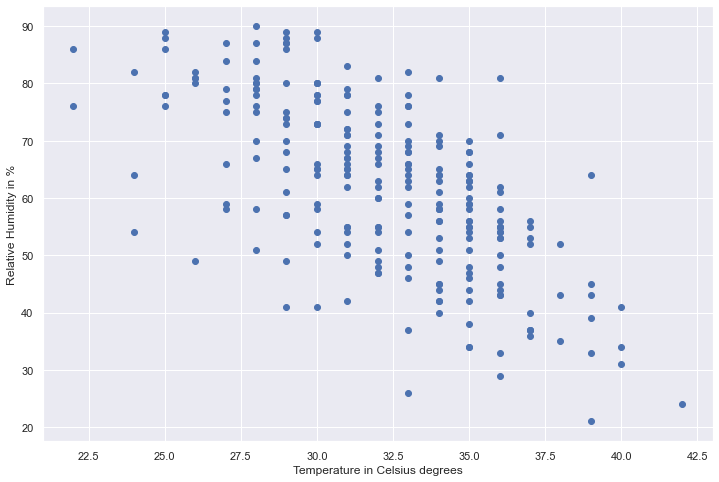

In [38]:
plt.scatter(df['Temperature'],df['RH'])
plt.xlabel("Temperature in Celsius degrees")
plt.ylabel("Relative Humidity in %")

# Observation :
The relation between humidity and temperature is inversely proportional.

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

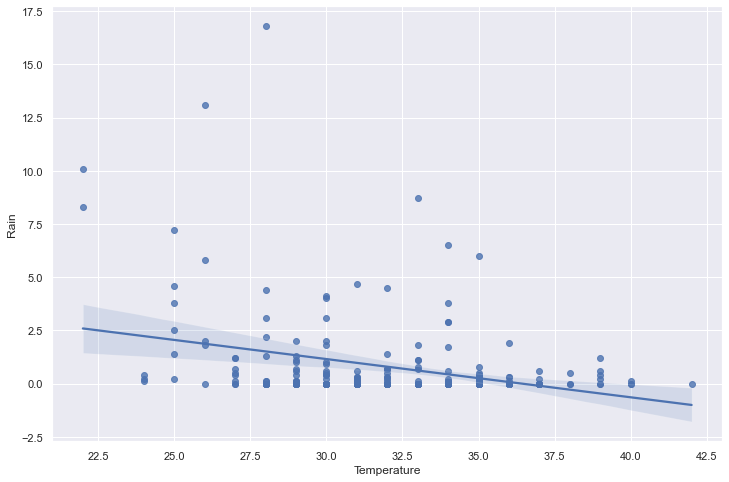

In [39]:
sns.regplot(x=df['Temperature'], y=df['Rain'],data= df)

C:\Users\w10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH'>

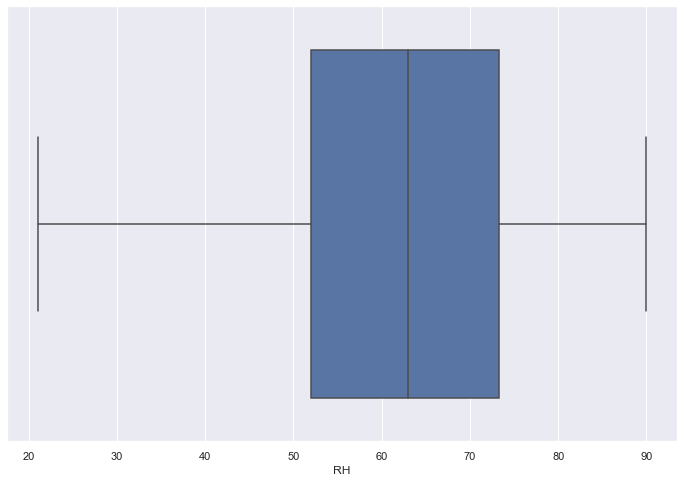

In [40]:
# Checking the outliers by boxplot
sns.boxplot(df['RH'])

In [41]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [42]:
#Droping features 'day','month','year'] beacuse it is not important for analysis 
df.drop(['day','month','year'], axis=1, inplace=True)

In [43]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [44]:
#Independent and Dependent Features

X= df[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y= df['Temperature']

In [45]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [46]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

In [47]:
# Splitting train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
114,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7
65,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
135,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7
210,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1
165,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8
...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
182,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0


In [49]:
y_train

114    32
65     34
135    31
210    34
165    34
       ..
106    24
14     28
92     25
182    33
102    30
Name: Temperature, Length: 163, dtype: int32

In [50]:
# Standardize or Feature scaling 

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [51]:
scaler

StandardScaler()

In [52]:
X_train= scaler.fit_transform(X_train)

In [53]:
X_test=scaler.transform(X_test)

In [54]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.80014076,
        -0.47763563, -0.8196431 ],
       [ 0.14460201, -0.93856657, -0.39436188, ...,  0.16132584,
        -0.3471914 , -0.08219052],
       [-1.41768313,  2.04653297, -0.39436188, ...,  2.13233237,
         0.09906517,  1.36540157],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.04050741,
        -1.01314351, -0.90158227],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.52187581,
        -0.058841  ,  0.31384882],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.82417743,
        -0.9719506 , -0.87426921]])

In [55]:
X_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
         1.19490243e+00,  5.24725278e-01,  1.10592751e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -2.04288364e-01, -2.27949356e-01, -6.704542

# Model Training for Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [57]:
regression.fit(X_train,y_train)

LinearRegression()

In [58]:
#Printing the coefficients and intercepts

print("Coefficients are", regression.coef_)
print("Intercept is", regression.intercept_)

Coefficients are [-1.11905525 -0.45739521  0.09691421  1.67893862  1.07917612  0.72319354
  0.11814242 -1.39324802 -0.05262333]
Intercept is 31.98159509202454


In [59]:
#Prediction for the test data

reg_pred= regression.predict(X_test)


In [60]:
reg_pred

array([33.12113277, 34.27599153, 34.1081232 , 33.4551817 , 36.56742968,
       32.38680838, 35.34162102, 27.3654293 , 30.76167063, 29.53403578,
       29.26453111, 33.18737898, 33.74397562, 33.20293714, 34.15771284,
       32.27376808, 36.88282294, 25.33846086, 32.34613028, 33.72112033,
       30.64422533, 28.39171201, 35.13413644, 28.69736813, 36.33429667,
       26.88918698, 32.89023041, 33.36234711, 33.13267513, 34.69072521,
       34.6296513 , 31.52410657, 32.74168095, 33.33535668, 32.53412299,
       33.19055268, 30.2321709 , 34.50328733, 31.69115187, 23.92788304,
       33.8111882 , 34.00495789, 32.33564172, 24.96891784, 36.16141483,
       32.53768689, 31.24732598, 30.35652666, 35.49132159, 34.70573285,
       36.84582014, 31.16185778, 30.96947655, 34.24806396, 33.85580631,
       32.20004503, 36.68678969, 32.21851926, 30.13805868, 36.56085853,
       33.22333782, 29.95567173, 34.04112054, 32.18632508, 31.67567942,
       24.92633321, 33.25306646, 30.68494645, 36.66003733, 35.06

Text(0, 0.5, 'Test Predicted Data')

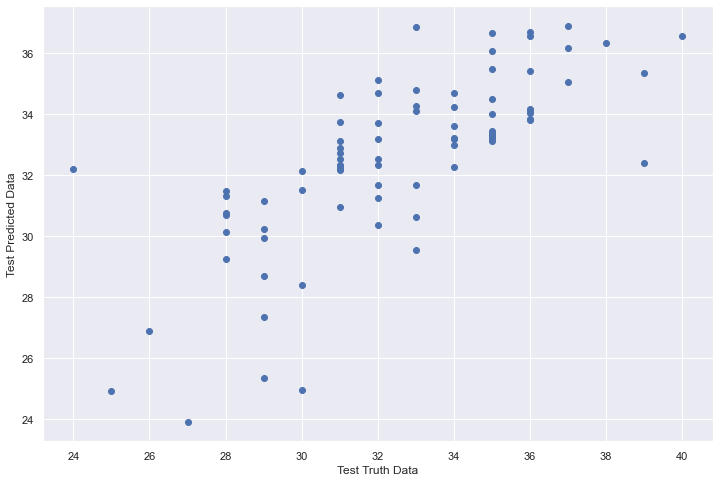

In [61]:
# Assumption of Linear Regression

plt.scatter(y_test, reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [62]:
# Residual

residual = y_test- reg_pred

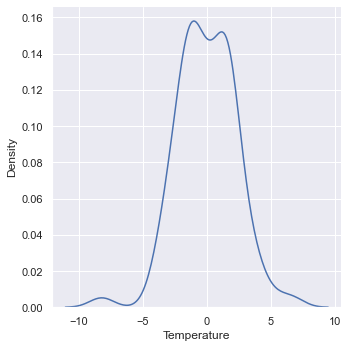

In [63]:
sns.displot(residual, kind="kde")

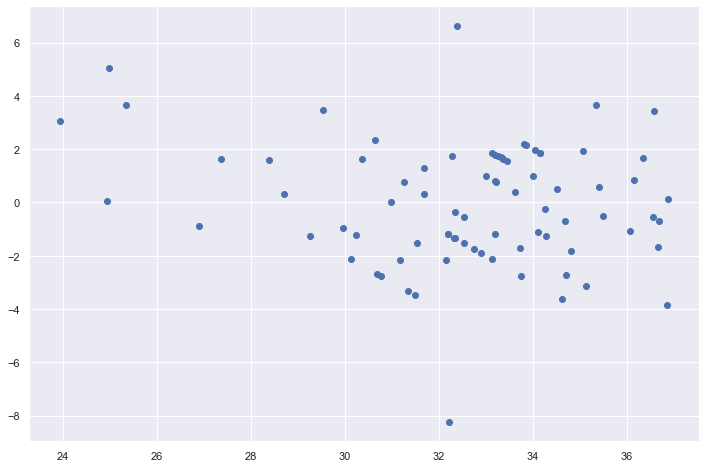

In [64]:
#Scatter plot Prediction and residual

plt.scatter(reg_pred,residual)

In [65]:
# Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE is", mean_squared_error(y_test,reg_pred))
print("MAE is",mean_absolute_error(y_test,reg_pred))
print("RMSE is",np.sqrt(mean_squared_error(y_test,reg_pred)))

MSE is 5.126398608590928
MAE is 1.8124385016780171
RMSE is 2.2641551644246753


In [66]:
# Computing R square and Adjusted R square

from sklearn.metrics import r2_score

score =r2_score(y_test,reg_pred)
print("R Square is", score)

R Square is 0.5227146123036033


In [67]:
#Adjusted R Square
print("Adjusted R Square is", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R Square is 0.4622136476660318


Notes: The accuracy of the model under R2 will increase as and when we increase the number of features(x).
But the Adjusted R2 will remain unaffected inspite of No. of features(x) we take , so R2 is less reliable then Adjusted R2

# Model training for Ridge Regression

Ridge Regression (also called as L2 Regularization),the main aim of ridge regression is to reduce overfitting

In [68]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge()

In [69]:
ridge_regression

Ridge()

In [70]:
ridge_regression.fit(X_train,y_train)

Ridge()

In [71]:
#Printing the Coefficients and Intercept

print("Coefficients are", ridge_regression.coef_)
print("Intercept is", ridge_regression.intercept_)

Coefficients are [-1.128844   -0.46133629  0.08183743  1.6314207   0.53993679  0.44532083
  0.16303925 -0.55090562 -0.11702728]
Intercept is 31.98159509202454


In [72]:
# Prediction for the Test Data

ridge_regression_pred= ridge_regression.predict(X_test)


In [73]:
ridge_regression_pred

array([33.12618992, 34.24674   , 34.06922682, 33.42510732, 36.53814134,
       32.42996174, 35.30762891, 27.4057252 , 30.79261446, 29.54793777,
       29.25913293, 33.24772941, 33.71838792, 33.21993484, 34.21546555,
       32.23843379, 36.80045992, 25.41971491, 32.30821218, 33.6815395 ,
       30.62048363, 28.39123683, 35.11991037, 28.71361891, 36.34377989,
       26.9248708 , 32.8908782 , 33.38172768, 33.12033053, 34.62363441,
       34.62800665, 31.51025782, 32.7258902 , 33.39246733, 32.52281669,
       33.20470157, 30.18157071, 34.51169763, 31.65133631, 23.9500916 ,
       33.82657625, 33.98804714, 32.34987969, 25.03226483, 36.09250024,
       32.50666047, 31.21803583, 30.38934469, 35.45342925, 34.68761049,
       36.79108503, 31.12578978, 30.96863631, 34.33251422, 33.84410339,
       32.32887485, 36.68517508, 32.20456918, 30.13608325, 36.54981854,
       33.17022939, 29.95378642, 33.97467454, 32.15149675, 31.69665969,
       24.95146106, 33.24563787, 30.66575481, 36.63611759, 35.05

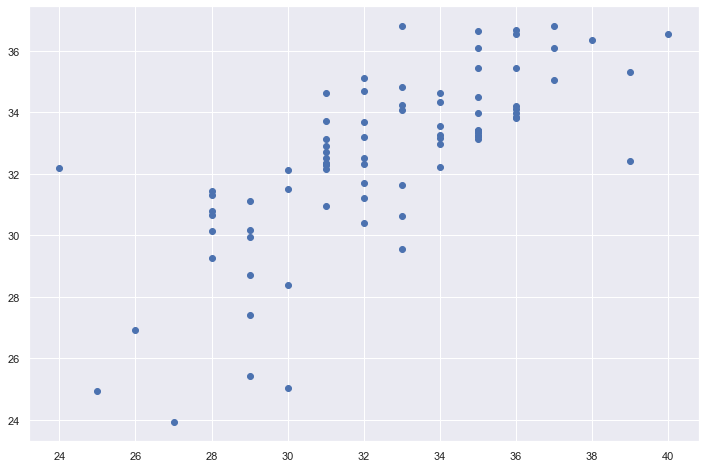

In [74]:
#Assumption of linear Regression

plt.scatter(y_test, ridge_regression_pred)


In [75]:
#Residual

residual= y_test-ridge_regression_pred

In [76]:
residual

24    -2.126190
6     -1.246740
156   -1.069227
214    1.574893
201    3.461859
         ...   
183    0.449240
5     -1.297258
56     0.569161
128   -2.125341
151    1.877724
Name: Temperature, Length: 81, dtype: float64

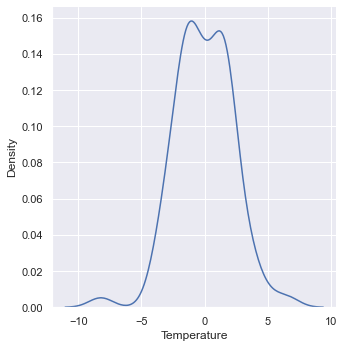

In [77]:
sns.displot(residual, kind="kde")

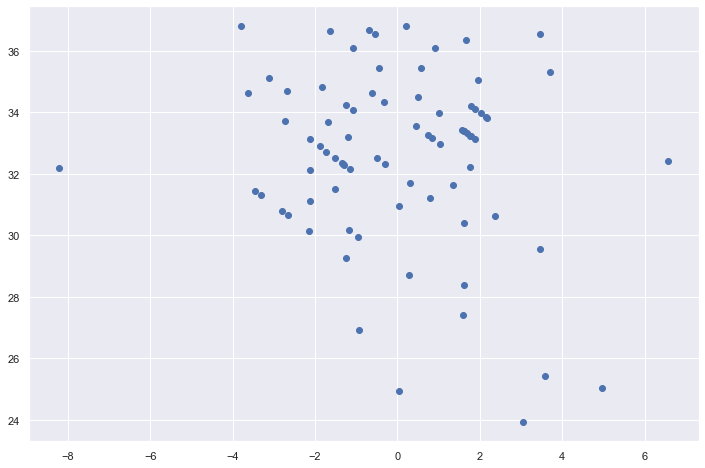

In [78]:
# Scatter plot for residual and predicted

plt.scatter(residual, ridge_regression_pred)

In [80]:
#Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE is:",mean_squared_error(y_test,ridge_regression_pred))
print("MAE is:",mean_absolute_error(y_test,ridge_regression_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,ridge_regression_pred)))

MSE is: 5.088713450266237
MAE is: 1.8084384577412904
RMSE is: 2.2558176899444327


In [81]:
# R Square and Adjusted R square

from sklearn.metrics import r2_score

score= r2_score(y_test,ridge_regression_pred)
print("R Square is: ",score)

R Square is:  0.5262232304924539


In [82]:
#Adjusted R Square
print("Adjusted R Square is: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R Square is:  0.46616702027318746


# Model training for Lasso Regression

Notes: LASSO Regression(also called as L1 Norm/L1 Regularization),the main aim of LASSO regressio is to reduce the features which are least correlated with dependent variables .

If our datasets has outliers we should use LASSO .

In [83]:
from sklearn.linear_model import Lasso

lasso= Lasso()

In [84]:
lasso

Lasso()

In [85]:
lasso.fit(X_train,y_train)

Lasso()

In [86]:
#Printing the Coefficients and Intercept

print("Coefficients are", lasso.coef_)
print("Intercept is", lasso.intercept_)

Coefficients are [-0.62324302 -0.         -0.          1.25581509  0.          0.
  0.          0.          0.        ]
Intercept is 31.98159509202454


In [87]:
# Prediction for the Test Data

lasso_pred= lasso.predict(X_test)

In [89]:
lasso_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

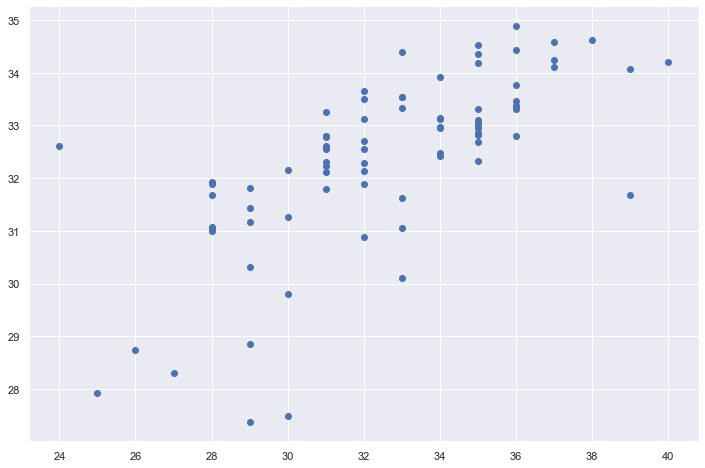

In [90]:
plt.scatter(y_test, lasso_pred)

In [91]:
#Residual

residual= y_test-lasso_pred

In [92]:
residual

24    -1.783811
6     -0.335821
156   -0.538357
214    2.308080
201    5.787876
         ...   
183    0.884428
5     -1.305114
56     2.230039
128   -2.157622
151    2.629312
Name: Temperature, Length: 81, dtype: float64

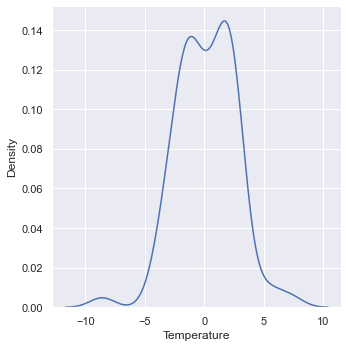

In [93]:
sns.displot(residual, kind= "kde")

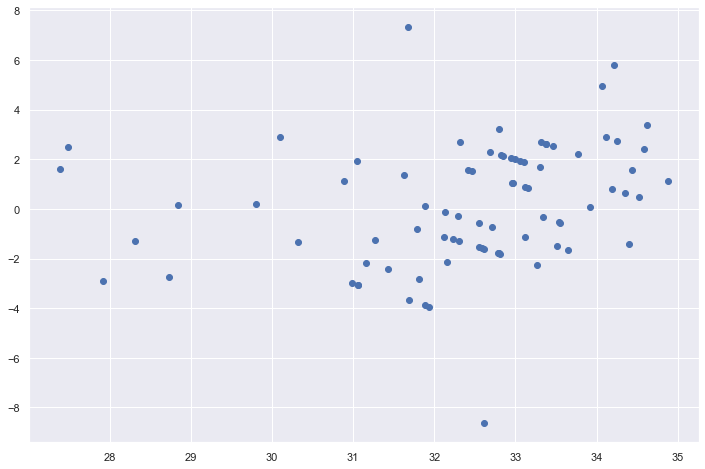

In [94]:
# Scatter Plot with prediction and residual

plt.scatter(lasso_pred,residual)

In [95]:
#Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE is:",mean_squared_error(y_test,lasso_pred))
print("MAE is:",mean_absolute_error(y_test,lasso_pred))
print("RMSE is:", np.sqrt(mean_squared_error(y_test,lasso_pred)))

MSE is: 6.085458745527471
MAE is: 1.9978776414662665
RMSE is: 2.4668722596696147


In [97]:
# R Square and Adjusted R square

from sklearn.metrics import r2_score

score= r2_score(y_test,lasso_pred)
print("R Square is: ",score)

R Square is:  0.4334228064508907


In [98]:
#Adjusted R Square
print("Adjusted R square is: ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R square is:  0.36160316219818667
